# Lagrange Interpolation
---

GENERAL PROBLEM: Suppose we are given values of some function $f(x_{0}),\ldots,f(x_{n})$, at the points $x_{0},\ldots,x_{n}$. Using these data alone, we want to find a polynomial, $p(x)$, that passes through those points and thereby approximates the function.

IDEA: Construct a generic polynomial with undetermined coefficients related to the function and it derivates at various points (say, using Taylor series expansions about different points). Set up an algebraic system of equations for the undetermined coefficients in terms of the given data. Solve.

## Warm-Up: Linear Interpolation

Suppose we are given $f(x_{0})$ and $f(x_{1})$ at the points $x_{0}$ and $x_{1}$, respectively. We can easily find the unique line that passes through those points as follows. The slope of the line is

\begin{equation}
   \text{slope} = \frac{f_{1} - f_{0}}{x_{1} - x_{0}},
\end{equation}

where $f_{i}=f(x_{i})$. The equation for the line can therefore be written

\begin{equation}
   p(x) = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})}x + p(0).
\end{equation}

Evaluating this at $x_{0}$ gives

\begin{equation}
   p(x_{0}) = f_{0} = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})}x_{0} + p(0).
\end{equation}

We now elimate $p(0)$ in terms of the given data. Solving for $p(0)$ gives

\begin{equation}
   p(0) = \frac{(x_{1} f_{0} - f_{1} x_{0})}{(x_{1} - x_{0})}.
\end{equation}

Plugging this back into the expression for $p(x)$ above gives

\begin{equation}
   p(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})}f(x_{0}) 
   + \frac{(x - x_{0})}{(x_{1} - x_{0})}f(x_{1}).
\end{equation}

By inspection we see that $p(x_{0})=f(x_{0})$ and $p(x_{1})=f(x_{1})$, as required. The function $p(x)$ is therefore the unique line that passes through $f(x_{0})$ and $f(x_{1})$. This solution is the (first or n=1) Lagrange interpolating polynomial. In this case, the polynomial is just a line. We will generalize this procedure to higher-order polynomials below.

### Interpolating Function via Taylor Series

As an alternative to the above derivation, we may derive the same result from Taylor series considerations. The Taylor series expansions of $f(x)$ in the neighborhoods of $x_{0}$ and $x_{1}$ yields

\begin{align*}
   f(x_{0}) &= f(x) + (x_{0} - x)f'(x) + \cdots \\
   f(x_{1}) &= f(x) + (x_{1} - x)f'(x) + \cdots.
\end{align*}

Next, approximate $f(x)$ by the truncated polynomial $p(x)$, leading to

\begin{align*}
   f(x_{0}) &= f_{0} = p(x) + (x_{0} - x)p'(x)\\
   f(x_{1}) &= f_{1} = p(x) + (x_{1} - x)p'(x).
\end{align*}

This gives two equations in the two unknowns, $p(x)$ and $p'(x)$. Solving for $p'(x)$ gives

\begin{equation}
   p'(x) = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})},
\end{equation}

and then plugging back in to get $p(x)$ gives

\begin{equation}
   p(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})}f(x_{0}) + \frac{(x - x_{0})}{(x_{1} - x_{0})}f(x_{1}).
\end{equation}

This gives the same interpolating function as above.

### Weight Functions

We can write the interpolating polynomial in terms of weight functions as follows

\begin{equation}
   p(x) = L_{0}(x)f(x_{0}) + L_{1}(x)f(x_{1}),
\end{equation}

where

\begin{equation}
   L_{0}(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})} 
   \quad\text{and}\quad 
   L_{1}(x) = \frac{(x - x_{0})}{(x_{1} - x_{0})}.
\end{equation}

To see that $L_{0}(x)$ and $L_{1}(x)$ act as weight functions, consider their asyptotic behavior.

\begin{align*}
   &\text{as } x\rightarrow x_{0}: \quad L_{0}\rightarrow 1 \quad\text{and}\quad L_{1}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{1}: \quad L_{0}\rightarrow 0 \quad\text{and}\quad L_{1}\rightarrow 1 \\
\end{align*}

As a result, $p(x_{0})\rightarrow f_{0}$ and $p(x_{1})\rightarrow f_{1}$.

### Linear Interpolation Code
Below is a program that implements the linear interpolation scheme above, given two data points.

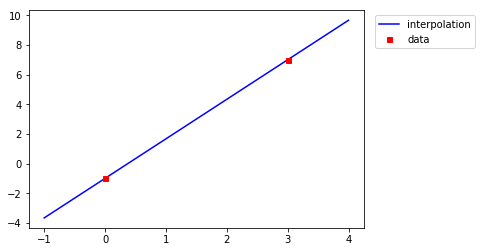

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interpLinear(x, xdata, fdata) :
    """ linear interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x0,x1], 1D array of grid points where function values are given
    fdata = [f0,f1], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """

    x0 = xdata[0]
    x1 = xdata[1]
    f0 = fdata[0]
    f1 = fdata[1]
    L0 = (x - x1)/(x0 - x1)
    L1 = (x - x0)/(x1 - x0)
    p = L0*f0 + L1*f1
    return p

data = np.array([[0,-1],[3,7]])
xdata = data[:,0]
ydata = data[:,1]

xmin = np.amin(xdata)
xmax = np.amax(xdata)

x = np.linspace(xmin-1,xmax+1,100)
y = interpLinear(x, xdata, ydata)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Quadratic Interpolation

Next suppose we are given $f(x_{0})$, $f(x_{1})$, and $f(x_{2})$ at the points $x_{0}$, $x_{1}$, and $x_{2}$, respectively. The quadratic equation that passes through these three points can be parameterized as

\begin{equation}
   p(x) = a_{0} + a_{1} x + a_{2} x^2,
\end{equation}

where $a_{0}$, $a_{1}$, and $a_{2}$ are undetermined coefficients. Evaluating $p(x)$ at $x_{0}$, $x_{1}$, and $x_{2}$ yields three equations in these undetermined coeffients

\begin{align*}
   p(x_{0}) &= a_{0} + a_{1} x_{0} + a_{2} x_{0}^2 \\
   p(x_{1}) &= a_{0} + a_{1} x_{1} + a_{2} x_{1}^2 \\
   p(x_{2}) &= a_{0} + a_{1} x_{2} + a_{2} x_{2}^2.
\end{align*}

Solving this system of equations and plugging the results back into the expression for $p(x)$ above gives

\begin{equation}
   p(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}f(x_{0}) 
   + \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}f(x_{1})
   + \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}f(x_{2}).
\end{equation}

By inspection we see that $p(x_{0})=f(x_{0})$, $p(x_{1})=f(x_{1})$, and $p(x_{2})=f(x_{2})$, as required. 

### Weight Functions
As before, $p(x)$ can be expressed in terms of weight functions as

\begin{equation}
   p(x) = L_{0}(x) f(x_{0}) + L_{1}(x) f(x_{1}) + L_{2}(x) f(x_{2}),
\end{equation}

where 

\begin{equation}
   L_{0}(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}
   \quad,\quad
   L_{1}(x) = \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}
   \quad,\quad
   L_{2}(x) = \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}.
\end{equation}

These weight functions have the asymptotic properties

\begin{align*}
   &\text{as } x\rightarrow x_{0}: 
      \quad L_{0}\rightarrow 1 \quad,
      \quad L_{1}\rightarrow 0 \quad,
      \quad L_{2}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{1}: 
      \quad L_{0}\rightarrow 0 \quad,
      \quad L_{1}\rightarrow 1 \quad,
      \quad L_{2}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{2}: 
      \quad L_{0}\rightarrow 0 \quad,
      \quad L_{1}\rightarrow 0 \quad,
      \quad L_{2}\rightarrow 1 
\end{align*}

As a result, $p(x_{0})\rightarrow f_{0}$, $p(x_{1})\rightarrow f_{1}$, and $p(x_{2})\rightarrow f_{2}$.

### Quadratic Interpolation Code
Below is an extension of the above code to the case of quadratic interpolation, given three data points. 

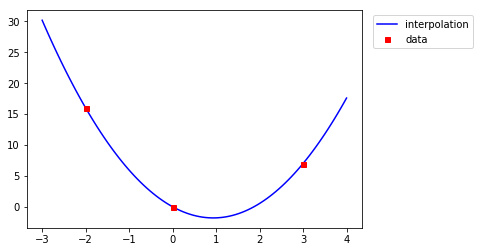

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interpQuad(x, xdata, fdata) :
    """ quadratic interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x0,x1,x2], 1D array of grid points where function values are given
    fdata = [f0,f1,f2], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """

    x0 = xdata[0]
    x1 = xdata[1]
    x2 = xdata[2]
    f0 = fdata[0]
    f1 = fdata[1]
    f2 = fdata[2]
    L0 = (x - x1)*(x - x2)/((x0 - x1)*(x0 - x2))
    L1 = (x - x2)*(x - x0)/((x1 - x2)*(x1 - x0))
    L2 = (x - x0)*(x - x1)/((x2 - x0)*(x2 - x1))
    p = L0*f0 + L1*f1 + L2*f2
    return p

data = np.array([[0,0],[3,7],[-2,16]])
xdata = data[:,0]
ydata = data[:,1]

xmin = np.amin(xdata)
xmax = np.amax(xdata)

x = np.linspace(xmin-1,xmax+1,100)
y = interpQuad(x, xdata, ydata)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Nth-Order Interpolating Polynomial

If $N+1$ data are given ($f(x_{0}),\ldots,f(x_{N})$) then the $N$th-order interpolating polynomial can be constructed using

\begin{equation}
   p(x) = L_{0}(x)f(x_{0}) + \cdots + L_{N}(x)f(x_{N})
   = \sum_{i=0}^{N} L_{i}(x) f(x_{i}),
\end{equation}

where 

\begin{equation}
   L^{(N)}_{i}(x) = \prod_{j=0, j\neq i}^{N}\frac{(x - x_{j})}{(x_{i} - x_{j})}.
\end{equation}

For example, for $N=3$ (cubic interpolation) and $i=2$:

\begin{equation}
   L^{(3)}_{2}(x) = \prod_{j=0, j\neq 2}^{3}\frac{(x - x_{j})}{(x_{2} - x_{j})}
   = \frac{(x - x_{0})(x - x_{1})(x - x_{3})}{(x_{2} - x_{0})(x_{2} - x_{1})(x_{2} - x_{3})}.
\end{equation}


### General Polynomial Interpolation Code
Below is an extension of the interpolation program above to the general case.

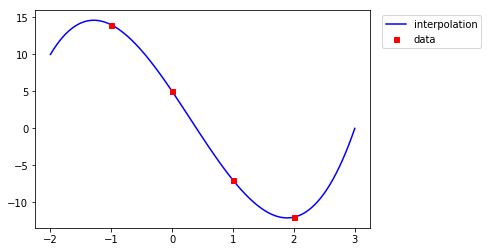

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def interp(x, xdata, fdata) :
    """ interpolation function
    
    INPUT:
    x = grid point where function value is wanted
    xdata = [x0,...,xN], 1D array of grid points where function values are given
    fdata = [f0,...,fN], 1D array of function values at given grid points

    OUTPUT:
    p = value of interpolating function at grid point
    """
    
    # initialize interpolating function
    p = 0
        
    # loop to calculate basis functions
    for i in range(len(xdata)):
        numerator = 1   # initialize numerator
        denominator = 1 # initialize denominator
        for j in range(len(xdata)):
            if j!=i:
                numerator = numerator*(x - xdata[j])
                denominator = denominator*(xdata[i] - xdata[j])

        Li = numerator/denominator
        p = p + Li*fdata[i]
            
    return p

# enter input data 
data = np.array([[-1,14],[0,5],[1,-7],[2,-12]]) # <-- ENTER DATA HERE
xdata = data[:,0]
ydata = data[:,1]

# define x-grid
xmin = np.amin(xdata)
xmax = np.amax(xdata)
x = np.linspace(xmin-1, xmax+1, 100)

# get interpolating polynomial on grid
y = interp(x, xdata, ydata)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1), loc=2)
plt.show()

### Example: Bessel function
To see this in action, let's apply it to Bessel functions, whose values are well-tabulated. Below is a table for the Bessel functions $J_{1}(x)$ from $x=0$ to $x=10.0$. 

\begin{align*}
   J_1(0.0) &= 0.00000\,00000 \\
   J_1(1.0) &= 0.44005\,05857 \\
   J_1(2.0) &= 0.57672\,48078 \\
   J_1(3.0) &= 0.33905\,89585 \\
   J_1(4.0) &= -0.06604\,33280 \\
   J_1(5.0) &= -0.32757\,91376 \\
   J_1(6.0) &= -0.27668\,38581 \\
   J_1(7.0) &= -0.00468\,28235 \\
   J_1(8.0) &= 0.23463\,63469 \\
   J_1(9.0) &= 0.24531\,17866 \\
   J_1(10.0) &= 0.04347\,27462
\end{align*}

Let's use these tabulated data to obtain an approximate value for $J_1(5.5)$. 

In [5]:
# point we wish to approximate J_1(x)
x = 5.5

# tabluated values for J_1(x)
J1 = np.zeros((11,2))
J1[0,:] = [0.0, 0.0000000000]
J1[1,:] = [1.0, 0.4400505857]
J1[2,:] = [2.0, 0.5767248078]
J1[3,:] = [3.0, 0.3390589585]
J1[4,:] = [4.0, -0.0660433280]
J1[5,:] = [5.0, -0.3275791376]
J1[6,:] = [6.0, -0.2766838581]
J1[7,:] = [7.0, -0.0046828235]
J1[8,:] = [8.0, 0.2346363469]
J1[9,:] = [9.0, 0.2453117866]
J1[10,:] = [10.0, 0.0434727462]

# linear interpolation
data_lin = np.array(J1[4:6,:])
xdata = data_lin[:,0]
ydata = data_lin[:,1]
lin = interp(x, xdata, ydata)

# quadratic interpolation (left-weighted)
data_quadL = np.array(J1[3:6,:])
xdata = data_quadL[:,0]
ydata = data_quadL[:,1]
quadL = interp(x, xdata, ydata)

# quadratic interpolation (right-weighted)
data_quadR = np.array(J1[4:7,:])
xdata = data_quadR[:,0]
ydata = data_quadR[:,1]
quadR = interp(x, xdata, ydata)

# cubic interpolation
data_cubic = np.array(J1[3:7,:])
xdata = data_cubic[:,0]
ydata = data_cubic[:,1]
cubic = interp(x, xdata, ydata)

# quintic interpolation
data_quint = np.array(J1[2:8,:])
xdata = data_quint[:,0]
ydata = data_quint[:,1]
quint = interp(x, xdata, ydata)

# heptic interpolation
data_hept = np.array(J1[1:10,:])
xdata = data_hept[:,0]
ydata = data_hept[:,1]
hept = interp(x, xdata, ydata)

# ninth-order interpolation
data_ninth = np.array(J1[:,:])
xdata = data_ninth[:,0]
ydata = data_ninth[:,1]
ninth = interp(x, xdata, ydata)

# print results
print ("linear interpolation                      =  ", lin)
print ("quadratic interpolation (left-weighted)   =  ", quadL)
print ("quadratic interpolation (right-weighted)  =  ", quadR)
print ("cubic interpolation                       =  ", cubic)
print ("quintic interpolation                     =  ", quint)
print ("heptic interpolation                      =  ", hept)
print ("ninth-order interpolation                 =  ", ninth) 

linear interpolation                      =   -0.4583470424
quadratic interpolation (left-weighted)   =   -0.404509613563
quadratic interpolation (right-weighted)  =   -0.341185383988
cubic interpolation                       =   -0.35173942225
quintic interpolation                     =   -0.342959170183
heptic interpolation                      =   -0.341449659433
ninth-order interpolation                 =   -0.341440842728
